# Week 9: Geometric transformation

# 1. Affine transformations

Reference: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html

$x' = Ax$

where 
```
A = [[a_11, a_12, a_13],
     [a_21, a_22, a_23],
     [  0 ,   0 ,   1 ]]
```

In Opencv, transformation matrix size 2x3:

```
M = [[m_11, m_12, m_13],
     [m_21, m_22, m_23]]
```

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [28]:
a = None
if not a:
    print(True)

True


In [33]:
def affine_transform(img, tmatrix, flags=cv2.INTER_LINEAR, save_result=None):
    rows, cols, _ = img.shape
    dst = cv2.warpAffine(img, tmatrix, (cols, rows), flags=flags)
    if save_result:
        cv2.imwrite(save_result, dst)
        print(f"Saved output image to {save_result}")
    plt.figure(figsize=(12, 16))
    plt.subplot(1, 2, 1), plt.imshow(img[...,::-1]), plt.title("original")
    plt.subplot(1, 2, 2), plt.imshow(dst[...,::-1]), plt.title("translated")
    plt.show()
    

## Translation

```
M = [[1, 0, tx],
     [0, 1, ty]]
```

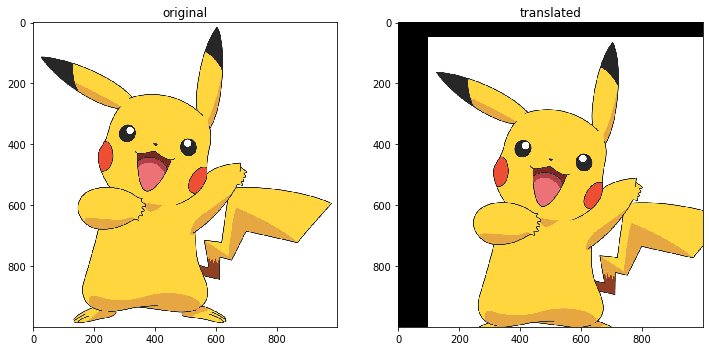

In [36]:
img = cv2.imread('pikachu.jpg')
rows, cols = img.shape[:2]

M = np.float32(
        [
            [1, 0, 100],
            [0, 1, 50]
        ]
)

affine_transform(img, M, cv2.INTER_LINEAR)

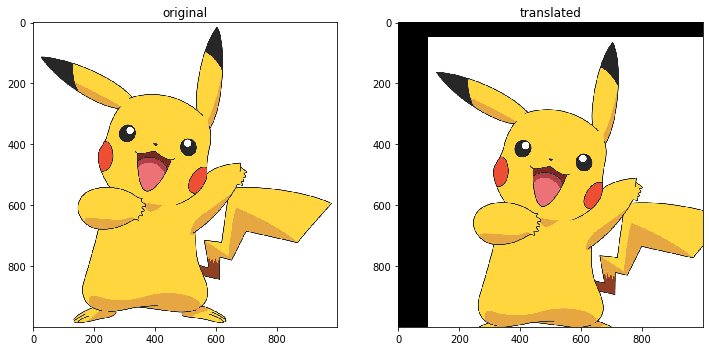

In [37]:
affine_transform(img, M, cv2.INTER_CUBIC)

## Rotation

Rotation of an image for an angle $\theta$ is achieved by the transformation matrix of the form: 
```
M = [[cos(angle), -sin(angle)],
     [sin(angle), cos(angle)]]
```

But OpenCV provided scaled rotation with adjustable center of rotation so that you can rotate at any location you prefer. Modified transformation matrix is given by:

```
M = [[ alpha    beta    (1-alpha)*center_x-beta*center_y],
     [-beta     alpha   beta*center_x+(1-alpha)*center_y]]
```

where

```
alpha = scale * cos(angle)
beta = scale * sin(angle)
```

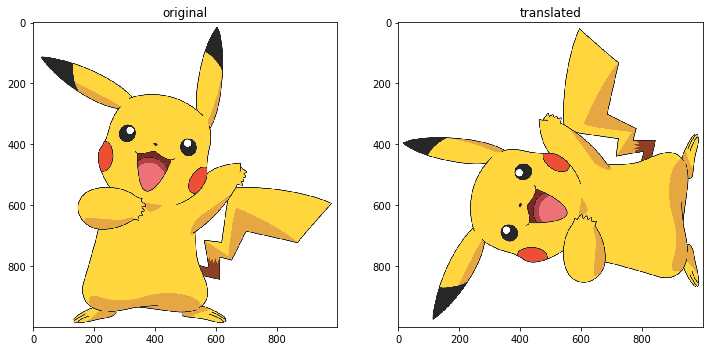

In [38]:
h, w = img.shape[:2]

M = cv2.getRotationMatrix2D((w//2, h//2), 90, 1)
affine_transform(img, M, cv2.INTER_CUBIC)

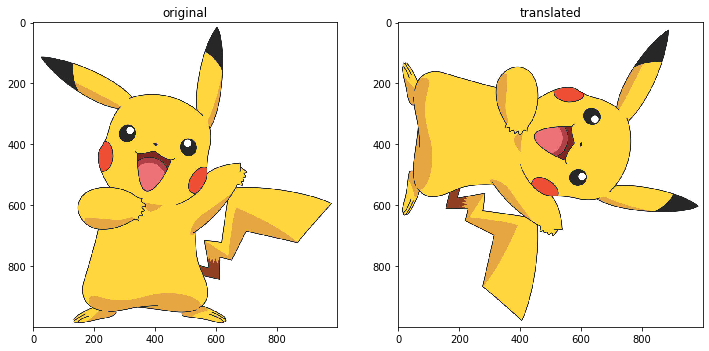

In [39]:
M = cv2.getRotationMatrix2D((w//2, h//2), -90, 1)
affine_transform(img, M, cv2.INTER_CUBIC)

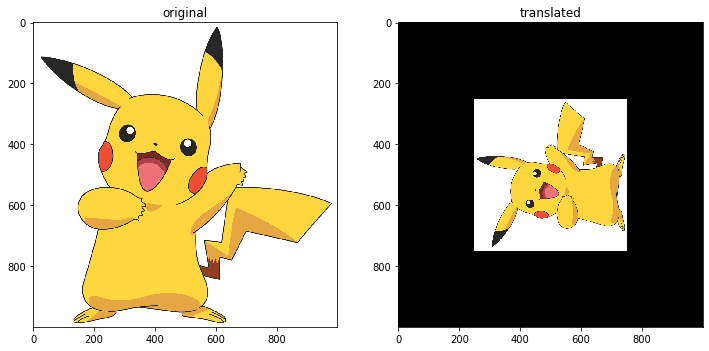

In [40]:
M = cv2.getRotationMatrix2D((w//2, h//2), 90, 0.5)
affine_transform(img, M, cv2.INTER_CUBIC)

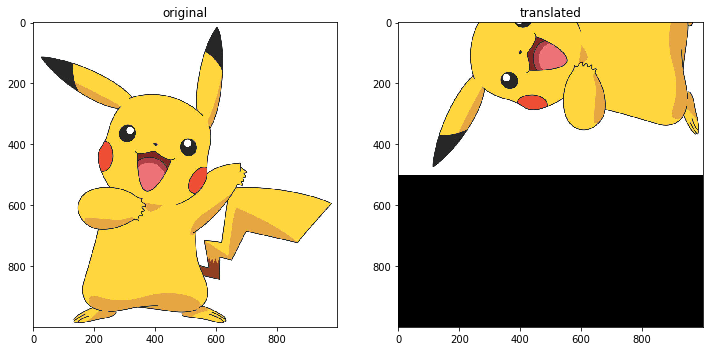

In [41]:
M = cv2.getRotationMatrix2D((w//4, h//4), 90, 1)
affine_transform(img, M, cv2.INTER_CUBIC)

## Transformation matrix from points

To find the transformation matrix, we need three points from input image and their corresponding locations in output image.

`cv2.getAffineTransform` creates a 2x3 matrix which is to be passed to `cv2.warpAffine`.

In [47]:
img = cv2.imread('drawing.png')

[[  1.68707483   0.85714286 -79.04761905]
 [ -0.68027211   1.42857143  73.80952381]]
(263, 213, 3)


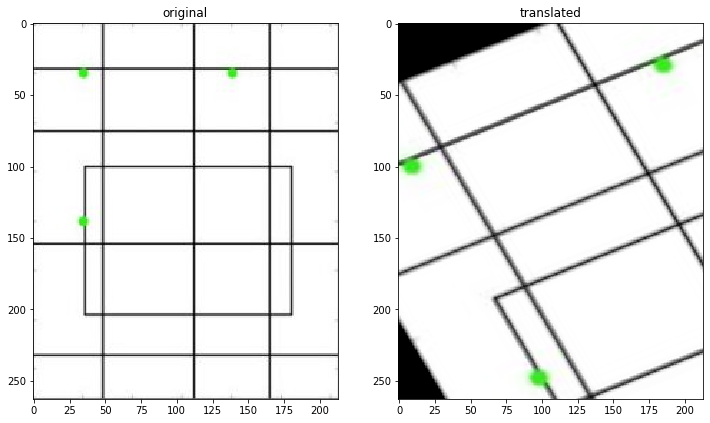

In [49]:
pts1 = np.float32([[35,35],[140,50],[35,140]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

print(M)
print(img.shape)
affine_transform(img, M)

# Perspective transformation

Transformation matrix 3x3

Straight lines will remain straight even after the transformation.

Need 4 points on the input image and corresponding points on the output image to find transformation matrix.
--> 3 out of 4 should not be colinear.

`cv2.getPerspectiveTransform` to find the matrix

`cv2.warpPerspective` to do the transform.

In [50]:
def perspective_transform(img, tmatrix, output_size, flags=cv2.INTER_LINEAR, save_result=None):
    rows, cols, _ = img.shape
    dst = cv2.warpPerspective(img, tmatrix, output_size, flags=flags)
    if save_result:
        cv2.imwrite(save_result, dst)
        print(f"Saved output image to {save_result}")
    plt.figure(figsize=(12, 16))
    plt.subplot(1, 2, 1), plt.imshow(img[...,::-1]), plt.title("original")
    plt.subplot(1, 2, 2), plt.imshow(dst[...,::-1]), plt.title("translated")
    plt.show()
    

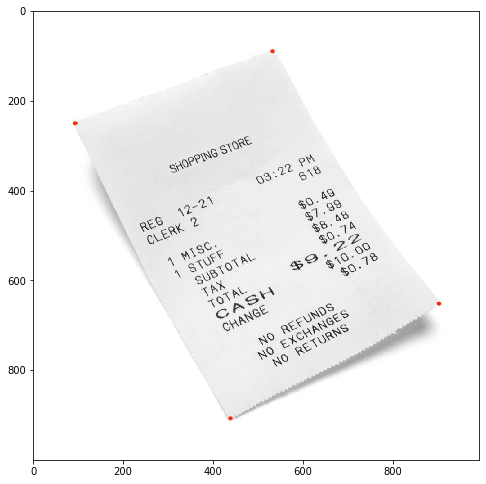

In [52]:
img = cv2.imread('receipt.jpg')
plt.figure(figsize=(8, 10))
plt.imshow(img[...,::-1])

In [53]:
pts1 = np.float32([[94, 253], [531, 93], [439,909], [903, 653]])
pts2 = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])

M = cv2.getPerspectiveTransform(pts1, pts2)

M

array([[ 5.58804768e-01, -2.93883605e-01,  2.18249039e+01],
       [ 1.75924068e-01,  4.80492610e-01, -1.38101493e+02],
       [-1.13464019e-04,  3.33113924e-04,  1.00000000e+00]])

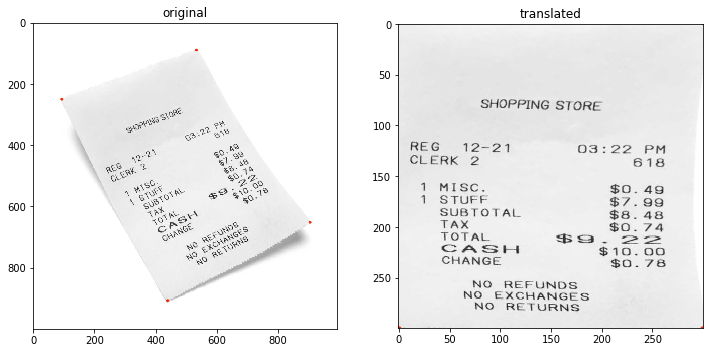

In [54]:
perspective_transform(img, M, (300, 300))

In [5]:
# Points generator
def get_grid(x, y, homogenous=False):
    coords = np.indices((x, y)).reshape(2, -1)
    return np.vstack((coords, np.ones(coords.shape[1]))) if homogenous else coords

In [8]:
coords = get_grid(2, 3)

In [9]:
coords

array([[0, 0, 0, 1, 1, 1],
       [0, 1, 2, 0, 1, 2]])

In [7]:
np.indices??

In [6]:
x = [1, 1, 3]
y = [0, 3, 0]
coords = get_grid(x, y)

TypeError: 'list' object cannot be interpreted as an integer

In [1]:
# Define Transformations
def get_rotation(angle):
    angle = np.radians(angle)
    return np.array([
        [np.cos(angle), -np.sin(angle), 0],
        [np.sin(angle),  np.cos(angle), 0],
        [0, 0, 1]
    ])
def get_translation(tx, ty):
    return np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])
def get_scale(s):
    return np.array([
        [s, 0, 0],
        [0, s, 0],
        [0, 0, 1]
    ])


In [ ]:

#some transformations
R1 = get_rotation(90)
T1 = get_translation(-2, 2)
S1 = get_scale(2)

#shorthand operator for matrix multiplication: @
rot = R1 @ coords
trans = T1 @ coords
scale = S1 @ coords
composite = R1 @ T1 @ coords
